# WIKI PAGE

# Overview

Most problems, whether in science, finance or engineering, are solved best when broken down into simpler, straightforward sub-problems.
For example: an astronomer is only adept at his skill in predicting and identifying events due to his ability to use his tools (calculus, scientific concepts like gravity and orbital mechanics) how and when required.
Similarly, a neural network consists of many layers; some are responsible for basic data interpretation and pattern recognition, and others work to combine said patterns and solve the problem.
This project deals with the way to combine various tools to solve a problem by cascading functions dealing with specific responsibilities.
In this project we have developed a cascading function layout which can be used for the estimation of credit score of a person.


# Multilingual Data Handling

The concept of cascading functions can be used to handle a multilingual dataset as follows:

f1 - language identifier : using the characters of the text, it identifies the language of the dataset
f2 - text cleaning : normalize/remove punctuation, and normalize the characters (like, in english, we usually make every character lowercase)
f3 - embedding text : this is the crucial step. Using multilingual embedding models (like multilingual BERT), this function will convert the clean text into a vector of numerics (language-free)
f4 - carrying out whatever task is intended (this in itself may be a cascade). May use NLP (natural language processing) to carry out tasks like predicting the tone/sentiment of a statement, or to pinpoint a topic/theme etc.
However, in our project, we have decided to implement a FinTech application.


# FinTech Applications
Function cascades can be applied across multiple financial technology contexts:
Credit Scoring: Improve accuracy by layering preprocessing, non-linear transformations, and predictive modeling.


Fraud Detection: Combine statistical anomaly detection with NLP-based insights from transaction narratives.


Risk Assessment: Merge structured numerical data with unstructured multilingual text for comprehensive evaluations.
In our case, the cascade predicts a client's credit score using historical data (using regression)

# Methodology

To explain the methodology behind cascading, let us take an example of a decision-making process for generating stock trading signals using multiple functions:

Example:
input - raw stock market data
f1 - cleaning data into OHLCV format
f2 - calculating various technical analysis tools (RSI, MACD, candlestick patterns)
f3 - deciding on what action to take
output - long/short/hold

Signal = f3(f2(f1(data)))

In this project, the methodology is carried out via the following functions:
1. data_cleaner - cleans data to remove any discrepancies
2. best_degree - decides on what relationship the model should follow (in this example we have compared linear and quadratic relationship for better r-squared value)
3. polynomial_transformer - creates the independents matrix using the powers of x till the degree decided earlier
final_model - 	performs the final regression


# Implementation


1. Data Acquisition

The dataset is downloaded from Kaggle using the opendatasets library.

Both training (CreditScore_train.csv) and test (CreditScore_test.csv) datasets are fetched and loaded into Pandas DataFrames.

2. Data Preparation

A subset of the training data is sampled to make experiments computationally manageable.

Data cleaning is applied:
Missing values are handled by replacing them with column means.

Data scaling is performed using StandardScaler to normalize the features before model training.

3. Feature Engineering

The notebook leverages polynomial feature transformation:

Input features are expanded into higher-degree polynomial combinations to capture non-linear relationships.

A function (best_degree) is implemented to determine the most suitable polynomial degree using cross-validation with LinearRegression.

4. Model Training

Based on the chosen polynomial degree, features are transformed.

A Linear Regression model is then trained on the polynomial-transformed features.

The training process includes fitting the model to the scaled and cleaned dataset.

5. Prediction

Once the final model is trained, it is used to make predictions on the transformed and scaled test dataset.

6. Functions in cascade

The code is structured as a pipeline of modular functions:

data_cleaner(df) → this function removes any nan value in the dataset and replaces it with the average of the numerical values in that set

data_scaler(df) → normalizes the dataset.

best_degree(X, y) → finds the optimal polynomial degree via cross-validation.

polynomial_transformer(d, X, y) → expands features to chosen polynomial degree.

final_model(data) → trains the regression model.

These functions are cascaded together to implement a systematic ML workflow from raw data to return a trained model which can be used for prediction
.

# Citations

[Lecture-1, Slide 18] : cascading to introduce non-linearity

[Lecture-2, Slide 21] : linear regression is not naively linear

Kaggle Dataset : https://www.kaggle.com/datasets/prasy46/credit-score-prediction






---



# COLAB NOTEBOOK

# **Implementing a Cascade of Functions for Non-linearity**
**Topic**: Explicitly captured using a cascade/composition of different f1(f2(f3....))).

**Reference**: Slide 18, Point 3, sub-bullet - "cascade/composition of different
f1(f2(f3....))".

**Specific Task**: Chain functions f1→f2→f3 to model non-linear process mimicking
neural networks.

# 1. Data Download

In this step, the dataset required for training and evaluation is retrieved directly from Kaggle using the "opendatasets" library. By linking to the online repository, the notebook ensures reproducibility and makes it convenient for others to acquire the same data without manual uploads. This approach also provides traceability, since the dataset source is clearly documented and verifiable.


In [ ]:
# Downloads dataset(s) or runs shell commands needed to prepare data.
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/prasy46/credit-score-prediction?select=CreditScore_test.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Atharva_1980
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prasy46/credit-score-prediction


100%|██████████| 13.1M/13.1M [00:00<00:00, 841MB/s]

# 2. Custom Dataframe creation

In [ ]:
import pandas as pd
#datasets with regular nomenclature of dataframes(df)
df2=pd.read_csv("/content/credit-score-prediction/CreditScore_test.csv")
df1=pd.read_csv("/content/credit-score-prediction/CreditScore_train.csv")

#using the sample function to randomly choose the small part of the dataset of the big datset
#creating training and test dataset
df1=df1.sample(n=1000,random_state=42)
X_train=df1.iloc[:,:-1]
y_train=df1.iloc[:,-1]
df2=df2.sample(n=100,random_state=42)
X_test=df2.iloc[:,:-1]
y_test=df2.iloc[:,-1]

# 3. Data cleaner
This section prepares the raw data for modeling by addressing missing values and other simple inconsistencies. Where numeric fields contain gaps, we impute with the column’s expected value (e.g., mean) so that we do not lose rows during training. The goal is to retain as much information as possible while maintaining statistical coherence, ensuring that downstream transformations and models receive a clean, numerically stable input.

In [ ]:
def data_cleaner(df):
  #fills the null values with the expectation value of the column
  df=df.fillna(df.mean())
  return df

# 4. Data scaling
Here we standardize numerical features so that each has approximately zero mean and unit variance. Standardization prevents features with large numeric ranges from dominating the learning process and typically improves the conditioning of linear and polynomial models. In practice, the scaler is *fit* on the training set and then *applied* to both training and test splits to avoid data leakage.

In [ ]:
#standard scalar from the sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
def data_scaler(df):
  #scales the values using its mean and varience to the normal random variable mean and variance (0,1).
  df=sc.fit_transform(df)
  return df

# 5. Best Degree Transformation
This step searches for a suitable polynomial degree that balances bias and variance for our regression task. By evaluating model performance across a small range of degrees, we select the degree that offers the best generalization on held‑out data. The selected degree is then used to construct polynomial features in the subsequent step.

In [ ]:
# polynomial features for non linearity, model choosed- linear regression, cross validation metric used to choose the best degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import  numpy as np

def best_degree(X_train,y_train):
  #The function returns best degree transformation for the given dataset
  degree=[1,2]
  best_degree=None
  best_score=-np.inf
  for d in degree:
    poly=PolynomialFeatures(d,include_bias=False)
    X_train_poly=poly.fit_transform(X_train)
    model=LinearRegression()
    scores=cross_val_score(model,X_train_poly,y_train,scoring="r2",cv=3)
    mean_score=np.mean(scores)
    #Taking the best score
    if mean_score>best_score:
      best_score=mean_score
      best_degree=d
  return best_degree

# 6. Polynomial Transformation
With the chosen degree, we expand the feature space using polynomial combinations (including interactions) of the original predictors. This engineered, higher‑dimensional representation allows linear models to capture non‑linear relationships. While powerful, polynomial expansion can increase overfitting risk; therefore it is paired with careful degree selection and evaluation.

In [ ]:
def polynomial_transformer(d,X_train,y_train):
  #The function does the polynomial transformation of given degree, to introduce the non linearity
  poly=PolynomialFeatures(degree=d,include_bias=False)

  #fitted the best degree
  X_train_poly=poly.fit_transform(X_train)
  return [X_train_poly,y_train]

# 7. Model Training

In [ ]:
def final_model(list1):
  #Here, we are training the model using the given datasets stored in the list
  X_train=list1[0]
  y_train=list1[1]
  model=LinearRegression()

  #Training the model
  model.fit(X_train,y_train)
  return model

# 8. Cascading function implementation
This block assembles the end‑to‑end pipeline as a cascade of small, testable functions: data cleaning → scaling → degree selection → polynomial feature generation → model training. A functional cascade makes the workflow explicit and reusable, enabling us to call one routine that handles preprocessing and modeling consistently for any compatible dataset.

In [ ]:
#cascading functions which returns a trained model
#flow: data_cleaner → train_test_split → data_scaler → best_degree → polynomial_transformer → final_model
model=final_model(polynomial_transformer(best_degree(data_scaler(data_cleaner(X_train)),y_train),data_scaler(data_cleaner(X_train)),y_train))

#Model prediction
y=model.predict(polynomial_transformer(best_degree(data_scaler(data_cleaner(X_train)),y_train),data_scaler(data_cleaner(X_test)),y_train)[0])
print(y)


[474.01331015 531.67678482 781.49507893 600.27050353 543.71984566
 711.45946352 399.53027785 714.48086754 511.00742317 866.0122069
 527.39797878 623.03677228 538.10395992 511.26178539 554.92294897
 801.12588406 596.42478334 699.04152442 648.87286371 449.18852381
 702.09544425 750.35508729 755.44129798 788.29500121 439.14269019
 579.62142042 397.6910118  393.21705843 904.22829647 441.34115
 538.68925835 515.17935965 592.61839637 630.27831471 564.08300742
 729.78199825 650.49498867 573.88386094 613.32769783 655.38546158
 512.37170558 591.99581387 665.83956527 660.99700451 529.64696005
 810.4358121  758.95416337 578.31539787 553.90569759 507.54975816
 598.89116581 518.85161988 621.59374065 811.27918914 773.81033724
 553.6737697  812.11292027 524.27921452 873.10395528 581.26838969
 603.28332234 589.21921242 450.19538654 763.85266557 539.12163102
 468.4662767  512.85066231 782.47667325 544.0346681  592.6864139
 560.83328139 906.79860593 533.52763133 548.69622775 558.678343
 737.33479289 735

# 9. Evaluation metrics- r square
We report the coefficient of determination (R²), which quantifies the proportion of variance in the target that is explained by the model. An R² of 1.0 indicates a perfect fit, whereas values near 0 suggest the model explains little beyond the mean predictor. Interpreting R² alongside diagnostic plots helps judge both accuracy and reliability.


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y))   #a fit with an r-squared of 0.7+ is a decent fit, 0.8+ is strong and 0.9+ is very strong

0.8008403996108007


# 10. Visual Representation


***Predicted vs Actual Plot***

Purpose – Compares model predictions with true observed values in regression.

Interpretation – Points near the 45° diagonal show accurate predictions; scattered points show errors.

Significance – Helps assess model accuracy, detect bias/variance issues, and identify outliers.

This scatter plot compares predicted values against ground‑truth targets. Points lying close to the diagonal line indicate accurate predictions; systematic deviations or curved patterns can signal model bias or insufficient feature engineering.


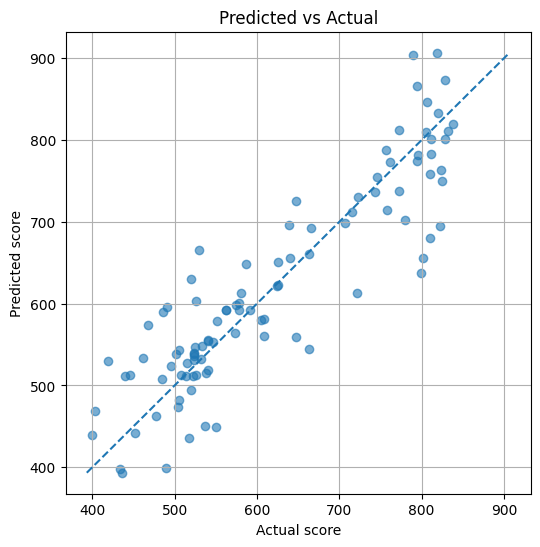

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y, alpha=0.6)
mn = min(y_test.min(), y.min())
mx = max(y_test.max(), y.max())
plt.plot([mn, mx], [mn, mx], linestyle='--')  # y=x line is the benchmark case, where predicted and actual values match
plt.xlabel("Actual score")
plt.ylabel("Predicted score")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

***Residuals vs Predicted Plot***

Purpose – Displays residuals (actual − predicted) against predicted values to evaluate model errors.

Interpretation – Random scatter around the horizontal zero line suggests a good fit; patterns or trends indicate bias, non-linearity, or heteroscedasticity.

Significance – Useful for diagnosing model assumptions, checking variance consistency, and spotting systematic prediction errors.

This diagnostic plot charts residuals (actual − predicted) against the model’s predictions. A healthy model exhibits a random, band‑shaped cloud around zero with no visible trend. Patterns, funnels, or curvature often indicate heteroscedasticity or unmodeled non‑linearity.

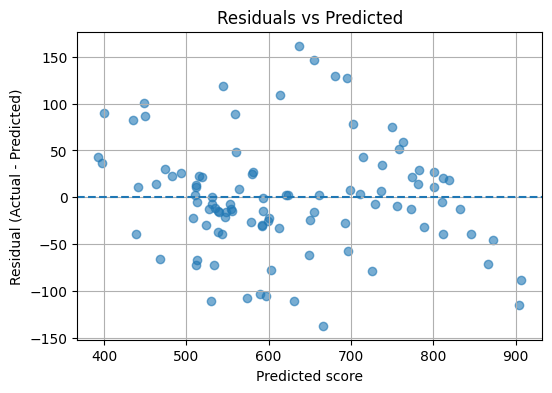

In [ ]:
residuals = y_test - y
plt.figure(figsize=(6,4))
plt.scatter(y, residuals, alpha=0.6)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()

***Residuals Distribution Plot***

Purpose – Shows the frequency distribution of residuals to check how errors are spread.

Interpretation – A roughly symmetric, bell-shaped distribution centered at zero indicates unbiased predictions; skewness or heavy tails suggest model misspecification.

Significance – Helps validate regression assumptions and detect outliers or systematic errors in the model.

This histogram shows how residuals are distributed. A roughly bell‑shaped, zero‑centered distribution suggests unbiased errors and supports the assumptions of many regression diagnostics. Heavy tails or skew may warrant revisiting feature transformations or error modeling.

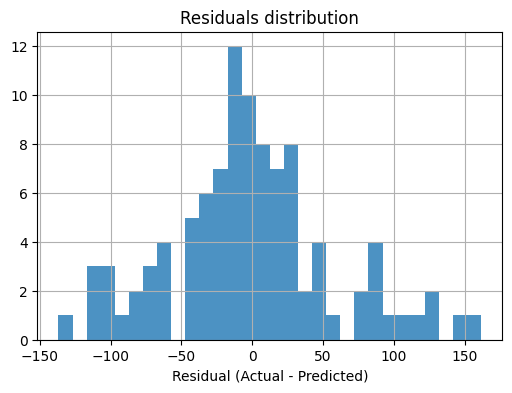

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, density=False, alpha=0.8)
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residuals distribution")
plt.grid(True)
plt.show()